In [84]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy.matlib as mat
%matplotlib inline

# Euler Discretization Methods

 - So far, we have discussed stochastic processes that can easily be exactly simulated at discrete points.
 
 - For some financial engineering models exact simulation is complicated or infeasible.
 
 - A useful method for "approximately'' simulating stochastic differential equations is the **Euler method**.
     - The Euler method discretizes time and simulates a stochastic process as it evolves using the dynamics described by the SDE at the current time.
     - The Euler method gives a better approximation as the discretization becomes finer.

**(Example):** Brownian motion with deterministic drift $\mu(\cdot)$ and volatility $\sigma^2(\cdot)$.

- Here $\mu(\cdot)$ and $\sigma(\cdot)$ depend on $t$ and $X(t)$ in a know way.   (E.g. $\mu(t) = \mu$ or $\mu(t) = t^2\mu$).

An exact simulation method for $X(t) = \int^t_{s=0}\mu(s)ds + \sigma(t)W(t)$ is the random walk construction given by

\begin{equation}
X(t_i) = X(t_{i-1}) + \int_{t_{i-1}}^{t_i} \mu(s) \, ds + \sqrt{\left(\int_{t_{i-1}}^{t_i}\sigma^2(s) \, ds\right)} Z_i \quad \textrm{for }i = 1, \ldots, m.
\end{equation}


<br>
<font color='blue'>
It's easy to verify that when $\mu$ and $\sigma$ are constants we get back to what we saw last week:

\begin{equation*}
    X(t_i) = X(t_{i-1}) + \mu(t_i - t_{i-1}) + \sigma \sqrt{t_i - t_{i-1}}Z_i
\end{equation*}

</font>


The corresponding Euler approximation of the above (in black) is

$$X(t_i) = X(t_{i-1}) + \mu(t_{i-1})(t_i - t_{i-1}) + \sigma(t_{i-1})\sqrt{t_i - t_{i-1}}Z_i \quad \textrm{for }i = 1, \ldots, m.$$

 - Notice that the terms $\mu(t_{i-1})$ and $\sigma(t_{i-1})$ are used to advance the stochastic process from time $t_{i-1}$ to time $t_i$.
 
 - The Euler approximation is inexact, even at the points $t_1, \ldots, t_m$, but it avoids the need to integrate $\mu(\cdot)$ and $\sigma^2(\cdot)$.


### Question 1

#### Square-root interest-rate model: 
Assume the interest rate follows the SDE:
\begin{equation*}
dr(t) = a(b-r(t))dt + \sigma \sqrt{r(t)}dW(t),
\end{equation*}
where $\{W(t): t \geq 0\}$ is a standard Brownian motion.

- The process is *mean-reverting* in the sense that $r(t)$ is pulled toward $b$. 

- The constant $b$ can be thought of as the long-run interest rate and $a$ can be thought of as the speed at which $r(t)$ reverts to $b$.

Choose the parameters as:
$$ T = 1, \: a = 0.2, \: b = 0.09, \: \sigma = 0.05, \: r(0) = 0.06. $$

Use standard Monte Carlo simulation with an Euler approximation to estimate the price of a
bond with payoff 1 and maturity $T$, i.e.,

$$ B_0 = \mathbb{E}(e^{-\int_{0}^{T}r(u)\,du}). $$

Use 1,000 macroreplications with a discretized time step size of 0.01 and provide a 95\% confidence interval for the bond price.

The theoretical bond price is 0.9391.


<font color='blue'>
$$X(t_i) = X(t_{i-1}) + \mu(t_{i-1})(t_i - t_{i-1}) - \sigma(t_{i-1})\sqrt{t_i - t_{i-1}}Z_i \quad \textrm{for }i = 1, \ldots, m.$$

</font>

In [85]:
# Short rate model parameters
a = 0.2
b = 0.09
sigma = 0.05
r0 = 0.06

# Monte Carlo parameters
T = 1
n = 100
dt = T/n
reps = 1000

# Matrix for interest-rate over time
r = np.zeros([reps,n+1])
r[:,0] = r0 # initialize

# Euler approximation
for i in range(reps):
    for j in range(n):
        r[i,j+1] = r[i,j] + a*(b-r[i,j])*dt + sigma*np.sqrt(np.abs(r[i,j]))*np.sqrt(dt)*np.random.normal(0,1)

# Calculate the discounted payoff via a Riemann sum
B0 = np.exp((-dt)*np.sum(r,1))

# Calculate the average discounted payoff and 95% CI
bondPrice = np.mean(B0)
std_bondPrice = np.std(B0, ddof=1)
CIlb = bondPrice - 1.96 * std_bondPrice/np.sqrt(reps)
CIub = bondPrice + 1.96 * std_bondPrice/np.sqrt(reps)

print('Theoretical bond price: 0.9391')
print('Estimated bond price:   %.4f' % bondPrice)
print('95%% CI: [%.4f, %.4f]' % (CIlb, CIub))

Theoretical bond price: 0.9391
Estimated bond price:   0.9387
95% CI: [0.9383, 0.9391]


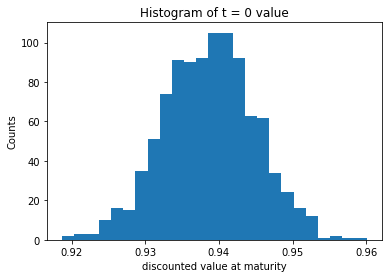

In [86]:
# Plot the simulated values
plt.hist(x=B0, bins=25)
plt.ylabel('Counts')
plt.xlabel('discounted value at maturity')
plt.title('Histogram of t = 0 value')
plt.show()

### Question 2

#### Square-root stochastic volatility model:
Assume the stock price follows a two-factor stochastic volatility SDE:

\begin{eqnarray*}
dS(t) &=& rS(t)dt + \sqrt{V(t)}S(t) dX_1(t)\\
dV(t) &=& a(b-V(t))dt + \sigma \sqrt{V(t)}dX_2(t)
\end{eqnarray*}

where $X = \{(X_1(t), X_2(t)): t \geq 0\}$ is a two-dimensional Brownian motion with zero drift and covariance matrix
$$ \Sigma = \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}. $$
Choose the parameters as:
$$ T = 1,\: r = 0.05, \: a = 0.2, \: b = 0.09, \: \sigma = 0.1, \: \rho = 0.75, \: S(0) = 80, \: K = 80. $$

### Part (a) 
(a) Assume that the initial value of the volatility process is the same as
its long-term mean, i.e., $V(0) = b = 0.09$.

Use standard Monte Carlo simulation with Euler approximations on $S$ and $V$ to estimate the price of a European call option, with strike $K$ and maturity $T$.

Use 1,000 replications with a discretized time step size of $0.05$ and provide a 95\% confidence interval for the price of the option.

<font color='blue'>    
The pairs $(X_1(t), X_2(t))$ follow a joint distribution $\mathcal{N}(0, \Sigma)$.
    
Recall: We can simulate them with the Cholesky method.


- Find the decomposition $A$: $AA^T = \Sigma$, in this case $A =
\begin{bmatrix}
1 & 0 \\
\rho & \sqrt{1 - \rho^2}
\end{bmatrix}$.

- So we simulate the $(X_1, X_2)$ via $AZ$, $Z \sim \mathcal{N}(0, I)$.
</font>

In [87]:
# The Cholesky factorization
rho = 0.75

# By hand 
L = np.matrix([[1, 0], [rho, np.sqrt(1-rho**2)]])

# Using numpy
A = np.linalg.cholesky(np.matrix([[1, rho],[rho, 1]]))

L - A

matrix([[0., 0.],
        [0., 0.]])

<font color='blue'>
Choose parameters as: $T = 1,\: r = 0.05, \: a = 0.2, \: b = 0.09, \: \sigma = 0.1, \: \rho = 0.75, \: S(0) = 80, \: K = 80$ and set $V(0) = b$.
    
    
Recall: Given $S(T)$ the discounter price is $e^{-rT}[S(T) - K]^+$.
</font>

In [88]:
# For part c, simply change V_0 = b to the other initial values

# Model parameters
r = 0.05
a = 0.2
b = 0.09
sigmaV = 0.1
rho = 0.75
S_0 = 80
K = 80
V_0 = 0.02 #(a): b; (c): 0.2, 0.02

# Cholesky decomposition
L = np.matrix([[1, 0], [rho, np.sqrt(1-rho**2)]])

# Monte Carlo parameters
T = 1
reps = 1000
dt = 0.05
n = int(1/dt)

# Payoffs
C = np.zeros([reps, 1])

for i in range(reps):
    S = np.zeros(n+1)
    V = np.zeros(n+1)
    S[0] = S_0
    V[0] = V_0
    
    for j in range(n):
        X = L*np.random.normal(0,1,[2,1]) # location, scale, shape (2 x 1)
        rootV = np.sqrt(np.abs(V[j]))     # Euler discretization
        # Advance dt
        S[j+1] = S[j] + r*S[j]*dt + rootV*S[j]*np.sqrt(dt)*X[0]
        V[j+1] = V[j] + a*(b-V[j])*dt + sigmaV*rootV*np.sqrt(dt)*X[1]
    
    # Calculate discounted payoff
    C[i] = np.exp(-r*T) * (S[n]-K) * ((S[n] > K) * 1) # (S[n] > K) in bool, * 1 makes it binary

# Calculate average discounted payoff and 95% confidence interval    
C_price = np.mean(C)
std_C = np.std(C, ddof=1)

CI_lb = C_price-1.96*std_C/np.sqrt(reps)
CI_ub = C_price+1.96*std_C/np.sqrt(reps)

print('Estimated price: %.2f' % C_price)
print('95%% CI: [%.4f, %.4f]' % (CI_lb, CI_ub))

Estimated price: 7.33
95% CI: [6.6281, 8.0235]


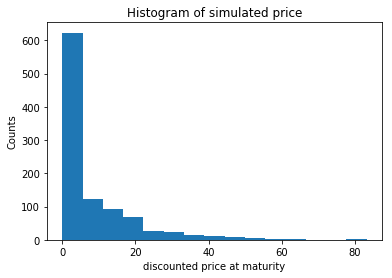

In [89]:
# Plot the simulated values
plt.hist(x=C, bins=15)
plt.ylabel('Counts')
plt.xlabel('discounted price at maturity')
plt.title('Histogram of simulated price')
plt.show()

### Part (b) 
(b) For comparison, what is the theoretical Black-Scholes price
for an option with volatility 0.3 under the geometric Brownian motion model, assuming all other parameters are the same?
The two prices should be close.

<font color='blue'>
Above we assumed a two-factor model where the volatility was given by $V(t)$:

\begin{eqnarray*}
dS(t) &=& rS(t)dt + \sqrt{V(t)}S(t) dX_1(t)\\
dV(t) &=& a(b-V(t))dt + \sigma \sqrt{V(t)}dX_2(t)
\end{eqnarray*}

Now assume a single-factor GBM with constant volatility $\sigma^2_S = b = \mathbb{E}[V(t)]$.

\begin{eqnarray*}
dS(t) &=& rS(t)dt + \sqrt{\sigma^2_S} S(t) dX(t)
\end{eqnarray*}

See $\texttt{GBMpost}$ for the **Black-Scholes** model:
\begin{eqnarray*}
Price &=& S(0) \Phi(d + \sigma_S \sqrt{T}) - Ke^{rT}\Phi(d), \quad \Phi(\cdot) \textrm{ is a std. Normal CDF} \\
    d &=& \frac{\log(S(0)/K) + (r - \tfrac{\sigma^2_S}{2})T}{\sigma \sqrt{T}}
\end{eqnarray*}

</font>

In [90]:
# Since b = E(V(t)), the volatility should be set as sqrt(b) for a fair comparison
sigma_S = np.sqrt(b) # = 0.03 

# Calculate Black-Scholes price
d = (np.log(S_0/K) + (r - sigma_S**2 / 2) * T) / (sigma_S * np.sqrt(T))

BS_price = S_0 * st.norm.cdf(d + sigma_S*np.sqrt(T)) - K * np.exp(-r * T) * st.norm.cdf(d) # st is scipy.stats

print('Theoretical Black-Scholes price: %.3f' % BS_price)

Theoretical Black-Scholes price: 11.385


### Part (c)
(c) What happens to the option price if the volatility process has
initial value $V(0) = 0.2$? $V(0) = 0.02$? Explain the reason for
the price differences.

<font color='blue'>

- For $V(0) = 0.2$, the estimate of the option price was $15.711$ with a 95\% confidence interval of $[15.129, 16.293]$.

- For $V(0) = 0.02$, the estimate of the option price was $7.155$ with a 95\% confidence interval of $[6.949, 7.361]$.

- Higher volatility means that more risk is involved, therefore the price of the option is higher for $V(0) = 0.2$ and lower for $V(0) = 0.02$.
